<a href="https://colab.research.google.com/github/jungyoojang/MachineLearning/blob/main/5_3_%ED%8A%B8%EB%A6%AC%EC%9D%98_%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 정형 데이터: CSV 파일처럼 구조를 가지고 있는 데이터

- 비정형 데이터: 테스트 데이터, 사진, 디지털 음악 등 구조를 가지지 않은 데이터

# 트리의 앙상블

**앙상블 학습 알고리즘**

- 정형 데이터를 다루는 데 가장 뛰어난 성과를 내는 알고리즘

- 주로 결정트리를 기반으로 함

## 랜덤포레스트 (random forest)

**랜덤 포레스트**

- 앙상블 학습 중 가장 유명하고 안정적인 성능을 제공

- 여러 개의 결정 트리를 랜덤하게 만들고 각 결정 트리의 예측을 사용해 최종 예측을 출력

- 어떻게 결정 트리를 랜덤하게 만들것인가가 핵심

**수행 절차**

1. 훈련하기 위한 데이터를 랜덤하게 만듦
- 입력된 훈련 데이터에서 랜덤하게 샘플을 추출함
- 중복된 샘플을 추출할 수 있음
- 이렇게 만들어진 샘플을 **부트스트랩 샘플(bootstrap sample)**이라 함
- 기본적으로 훈련 세트의 크기와 동일하게 설정됨


2. 부트스트랩 샘플로 결정트리를 훈련
- 각 노드를 분할할 때 전체 특성 중에서 일부 특성을 무작위로 고른 다음 이 중에서 최선의 분할을 찾음


3. 정해진 수만큼 위 과정을 반복

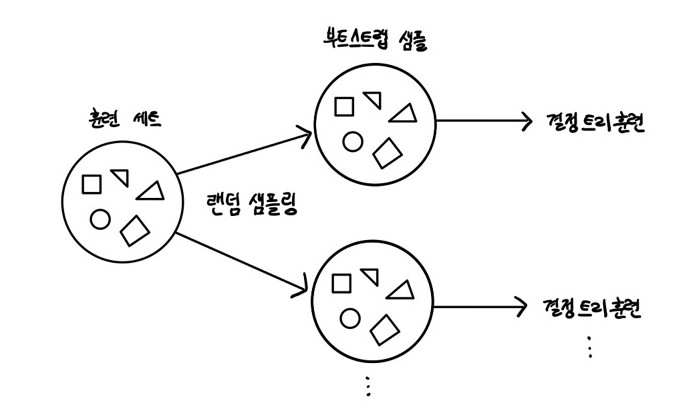

- 사이킷런의 랜덤 포레스트는 기본적으로 100개의 결정 트리를 훈련

- 랜덤포레스트는 누락된 값이 있어도 처리가 가능하다는 장점이 있음

In [ ]:
# 랜덤포레스트
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

이 예제는 매우 간단하고 특성이 많지 않아서 그리드 서치를
사용하더라도 하이퍼파라이처  튜닝의 결과가 크게 달라지지 않음

**RandomForestClassifier**

- 랜덤포레스트 클래스

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
# 훈련세트 점수 / 검증세트 점수 출력
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


특성 중요도 확인

- 각 결정트리의 feature_importances_ 취합

- 특성 선택에 무작위성을 넣었기 때문에, 단일 결정트리보다 골고루 나옴

In [ ]:
rf.fit(train_input, train_target) # 모델 훈련
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


과대적합을 줄이고 일반화 성능을 높이는 데 도움이 됨

**odd_score**

랜덤하게 부트스트랩 샘플을 선택하기 때문에 사용할 수 있는 RandomForestClassifier에서 제공하는 재미있는 기능이 있음

In [ ]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


## 엑스트라트리

랜덤 포레스트와 비슷하게 동작

- 부트스트랩 샘플을 사용하지 않고, 각 결정 트리를 만들때 전체 훈련 세트를 사용
- 노드를 분할 할 때 가장 좋은 분할을 찾지 않고 무작위로 분할함

**ExtraTreesClassifier**

- 엑스트라트리 클래스

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
# 훈련세트 점수 / 검증세트 점수 출력
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


랜덤 포레스트와 비슷한 결과를 얻음

In [ ]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


**Bagging vs Boosting**

- Bagging : 여러 개의 모델을 랜덤하게 만든다

- Boosting: 모델을 순차적으로 여러개 만들되 이전 모델을 보완한 새로운 모델을 만들고 최종적으로 생성된 모든 모델을 하나로 합침

## 그레이디언트 부스팅 (GB)

- 깊이가 얕은 결정 트리를 사용하여 이전 트리의 오차를 보완하는 방식의 앙상블 학습

- 사이킷런에서는 기본적으로 깊이가 3인 결정트리 100개를 사용

- 깊이가 얕은 결정 트리를 사용하므로 과대적합에 강하고 일반적으로 높은 일반화 성능을 기대할 수 있음

- 그레이디언트란 이름이 붙은 이유는 경사 하강법을 사용하여 트리를 앙상블에 추가하기 때문

- 분류에서는 로지스틱 손실 함수를 사용

- 회귀에서는 평균 제곱 오차 함수를 사용


---


경사하강법이 손실 함수를 산으로 정의하고 가장 낮은 곳을 찾아 내려오는 과정이라면, 그레디언트 부스팅은 결정 트리를 계속 추가하면서 가장 낮은 곳을 찾아 이동함

**GradientBoostingClassifier**

- 그레이디언트 부스팅 클래스

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
# 훈련세트 점수 / 검증세트 점수 출력
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


그레이디언트 부스팅은 결정 트리의 개수를 늘려도 과대적합에 매우 강함

학습률을 증가시키고 트리의 개수를 늘리면 조금 더 성능이 향상될 수 있음


- n_estimators : 추가할 트리 개수 설정

- learning_rate : 학습률 설정

In [ ]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
# 훈련세트 점수 / 검증세트 점수 큰 변화 없음
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


과대적합을 적절히 억제하고 있음

In [ ]:
# 특성 중요도 확인
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


랜덤 포레스트에 비해 덜 골고루 나옴 (일부 특성에 더 집중함)


일반적으로 그레이디언트 부스팅은 랜덤 포레스트보다 조금 더 높은 성능을 얻을 수 있음

그러나 순서대로 트리를 추가하기 때문에 훈련 속도가 느림

## 히스토그램 기반 부스팅

- 정형 데이터를 다루는 머신러닝 알고리즘 중 가장 인기가 높은 알고리즘

- 입력 특성을 256개의 구간으로 나누므로 최적의 분할을 매우 빠르게 찾을 수 있음

- 256개의 구간 중에서 하나를 떼어 놓고 누락된 값을 위해서 사용함

- 즉, 어떤 샘플에 누락된 값이 있다면 떼어놓은 구간의 값을 대신 사용함

- 따라서 입력에 누락된 특성이 있더라도 이를 따로 전처리할 필요가 없음


- 히스토그램: 데이터를 일정한 구간으로 쪼개서 막대그래프로 표현

**HistGradientBoostClassifier**

- 히스토그램 기반 GB 클래스

In [ ]:
# 사이킷런 1.0 버전 아래에서는 다음 라인의 주석을 해제하고 실행하세요.
# from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)
# 훈련세트 점수 / 검증세트 점수
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


과대적합을 억제하면서 그레이디언트 부스팅보다 좀 더 높은 성능

**permutation_importance()**

- 특성을 하나씩 랜덤하게 섞으면서 모델의 성능 변화를 관찰하여 어떤 특성이 중요한지 계산함 (많이 변할수록 중요한 특성)

- importance_mean: 최종 특성중요도

- importance_std: 특성중요도간의 표준편차

In [ ]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target) # 모델 훈련
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


테스트 세트에 대한 특성 중요도 계산

In [ ]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


최종적으로 테스트세트 점수 확인

In [ ]:
hgb.score(test_input, test_target)

0.8723076923076923

**사이킷런이 아닌 다른 곳에서 그레이디언트 부스팅 알고리즘을 구현한 라이브러리**



#### XGBoost

사이킷런의 cross_vaildate() 함수 사용 가능

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9555033709953124 0.8799326275264677


#### LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884


## 정리

더 강력한 성능의 모델을 만들기 위해 앙상블 학습을 도입

-> 랜덤 포레스트와 엑스트라 트리

-> 그레이디언트 부스팅

-> 히스토그램 기반 그레이디언트 부스팅

-> XGBoost, LightGBM 등

## 5주차 실습

실습 5.

WINE 데이터 세트를 이용하여
- 결정트리,
- 랜덤 포레스트,
- 엑스트라 트리,
- 그래이언트 부스팅,
- 히스토그램기반 그래이언트 부스팅

모델을 만들고 최적화



---


WINE 데이터 세트 (이진분류)

https://archive.uci.edu/dataset/186/wine+quality


In [1]:
import numpy as np
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
print(np.unique(wine['class']))

[0. 1.]


In [6]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)


In [8]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [12]:
# 결정 트리
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


In [13]:
# 랜덤 포레스트
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [14]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [23]:
rf.score(test_input, test_target)

0.8892307692307693

In [15]:
# 엑스트라 트리
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [16]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


In [24]:
et.score(test_input, test_target)

0.8861538461538462

In [17]:
# 그레이디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [18]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


In [25]:
gb.score(test_input, test_target)

0.8707692307692307

In [19]:
# 히스토그램 기반 부스팅
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [20]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [22]:
hgb.score(test_input, test_target)

0.8723076923076923